In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gzip
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from IPython.display import display, Markdown
%matplotlib inline

In [2]:
#Function for loading data
def read_data(file):
    with gzip.open(file,'rb') as f:
        if "label" in file: 
            x = np.frombuffer(f.read(),'B',offset = 8).reshape(-1,1)
        else:
            x = np.frombuffer(f.read(),'B',offset = 16).reshape(-1,784)/255
    return x

In [3]:
x_train = read_data('train-images-idx3-ubyte.gz')
ytrain = read_data('train-labels-idx1-ubyte.gz')
x_test = read_data('t10k-images-idx3-ubyte.gz')
ytest = read_data('t10k-labels-idx1-ubyte.gz')

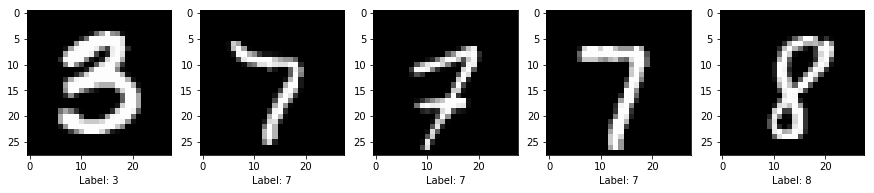

In [4]:
#Displaying random training set examples with labels
ind = random.sample(range(0,x_train.shape[0]),5)
fig = plt.figure(figsize=(15,10))
for i,index in enumerate(ind):
    num = x_train[index].reshape(28,28)
    label = ytrain[index][0]
    ax = fig.add_subplot(1,5,i+1)
    ax.set_xlabel('Label: {}'.format(label))
    plt.imshow(num,cmap='gray')

In [5]:
#Splitting into train and validation sets
x_train,x_val,y_train,y_val = train_test_split(x_train,ytrain,test_size = 0.25)

In [6]:
#Function for calculating accuracy
def accuracy(pred,true):
    count = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            count += 1
    return count/len(pred)

In [7]:
#Logistic regression model
clf = LogisticRegression(solver = 'lbfgs',multi_class='multinomial',max_iter = 2500)
clf.fit(x_train,y_train.ravel())
preds = clf.predict(x_val)
print("Accuracy on the validation set: {}%".format(accuracy(preds,y_val)*100))

Accuracy on the validation set: 91.86%


In [8]:
#Fitting model to test set
test_preds = clf.predict(x_test)
print("Accuracy on the test set: {}%".format(accuracy(test_preds,ytest)*100))

Accuracy on the test set: 92.4%


In [9]:
#Storing misclassified test images
wrong_test_nums = []
for i in range(len(test_preds)):
    if test_preds[i]!=ytest[i]:
        wrong_test_nums.append(i)

<h4>5 Incorrectly labelled test set examples</h4>

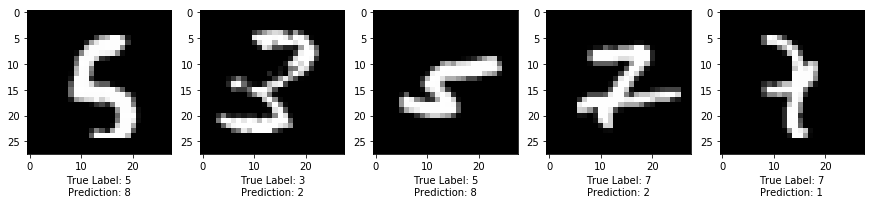

In [10]:
#Displaying 5 incorrectly classified test images
display(Markdown("<h4>5 Incorrectly labelled test set examples</h4>"))
fig = plt.figure(figsize=(15,10))
ind = random.sample(wrong_test_nums,5)
for i, index in enumerate(ind):
    num = x_test[index].reshape(28,28)
    ax = fig.add_subplot(1,5,i+1)
    plt.imshow(num,cmap='gray')
    ax.set_xlabel("True Label: {}\nPrediction: {}".format(ytest[index][0],test_preds[index]))